# Exercise 2.11


_Analyze the data in the table from a frequentist perspective by finding the
90 % confidence level interval for
p
as a function of energy. Use the Central
Interval to find the 90 % CL interval for
p
._

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [39]:
# Defining list of the given data
# using numpy arrays here
Energies = np.array([0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4.])
Trials = np.array([100, 100, 100, 100, 100, 1000, 1000, 1000])
Successes = np.array([0,4,20,58,92,987,995,998])

Efficiencies_estimate = 1.0 * Successes / Trials
Efficiencies_estimate

array([ 0.   ,  0.04 ,  0.2  ,  0.58 ,  0.92 ,  0.987,  0.995,  0.998])

In [10]:
def binom(r,N,p):
    factor1 = factorial(N)/(factorial(r)*factorial(N-r))
    factor2 = pow(p,r)*pow((1.-p),N-r)
    return factor1 * factor2
                        

In [42]:
# calculating the boundaries of the central interval
def central_interval(p, N, alpha):
    r_min = 0
    acc_sum = binom(0, N, p)
    while acc_sum < alpha/2.:
        r_min += 1
        acc_sum += binom(r_min, N, p)

        
    r_max = N
    acc_sum = binom(N, N, p)
    while acc_sum < alpha/2.:
        r_max -= 1        
        acc_sum += binom(r_max, N, p)
        
    return r_min, r_max

In [70]:
def smallest_interval(p, N, alpha):
    rs=list()
    r_probabilities=list()
    for r in range(0,N+1):
        rs.append(r)
        r_probabilities.append(binom(r,N,p))
    sorted_list = list(sorted(zip(r_probabilities,rs),reverse=True))
    mode = sorted_list[0][1]
    
    acc_sum=icount=0.
    r_min=r_max=int((N+1)*p)
    while acc_sum<(1.-alpha):
        acc_sum+=sorted_list[icount][0]
        if sorted_list[icount][1] > mode:
            r_max = sorted_list[icount][1]
        elif sorted_list[icount][1] < mode:
            r_min = sorted_list[icount][1]
        icount+=1
    if p ==0:
        r_min=r_max=0
    elif p==1:
        r_min=r_max=N
    return r_min, r_max

In [57]:
def neyman_CL(N,interval='ci',alpha=0.1):
    stepsize = 1/1000.
    p_values = np.arange(0,1,stepsize)
    r_mins = []
    r_maxs = []
    for p in p_values:
        if interval=='ci':
            rmin_tmp, rmax_tmp = central_interval(p,N,alpha)
        elif interval=='si':
            rmin_tmp, rmax_tmp = smallest_interval(p,N,alpha)
        r_mins.append(rmin_tmp)
        r_maxs.append(rmax_tmp)
    return r_mins, r_maxs, p_values
            

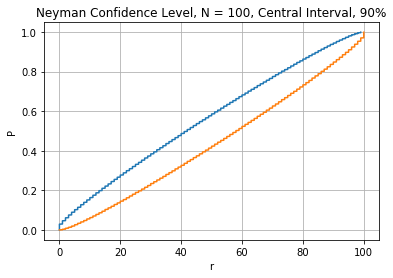

In [58]:
r_min_100, r_max_100, p_values = neyman_CL(100,'ci')
plt.plot(r_min_100, p_values)
plt.plot(r_max_100, p_values)
plt.xlabel('r')
plt.ylabel('P')
plt.title('Neyman Confidence Level, N = 100, Central Interval, 90%')
#plt.title('Neyman Confidence Level, N = 100, Smallest Interval, 90%')
plt.grid(True)
plt.show()

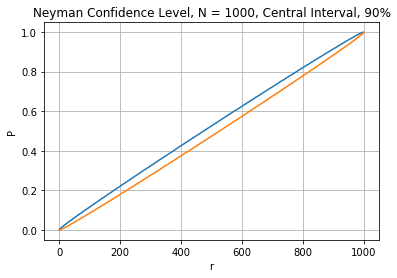

In [16]:
r_min_1000, r_max_1000, p_values = neyman_CL(1000,'ci')
plt.plot(r_min_1000, p_values)
plt.plot(r_max_1000, p_values)
plt.xlabel('r')
plt.ylabel('P')
plt.title('Neyman Confidence Level, N = 1000, Central Interval, 90%')
#plt.title('Neyman Confidence Level, N = 1000, Smallest Interval, 90%')
plt.grid(True)
plt.show()

In [17]:
print("Central Interval")
print("E(GeV)\t N\t r\t p_est\t p_min\t p_max" )

p_min = []
p_max = []

for i in range(0,len(Energies)):
    E = Energies[i]
    R = Successes[i]
    N = Trials[i]
    p_est = Efficiencies_estimate[i]
    if(N == 1000):
        r_min = r_min_1000
        r_max = r_max_1000
    else:
        r_min = r_min_100
        r_max = r_max_100
        
    p_min.append(np.asarray(r_max).searchsorted(R, side='left')/1000.)
    p_max.append(np.asarray(r_min).searchsorted(R, side='right')/1000.)
    print(str(E)+ '\t'+str(N)+ "\t"+ str(R)+ "\t"+ str(p_est)+ "\t"+ str(p_min[i])+ "\t" +str(p_max[i]))

Central Interval
E(GeV)	 N	 r	 p_est	 p_min	 p_max
0.5	100	0	0.0	0.0	0.03
1.0	100	4	0.04	0.014	0.09
1.5	100	20	0.2	0.137	0.278
2.0	100	58	0.58	0.493	0.664
2.5	100	92	0.92	0.861	0.96
3.0	1000	987	0.987	0.98	0.993
3.5	1000	995	0.995	0.99	0.999
4.0	1000	998	0.998	0.994	1.0


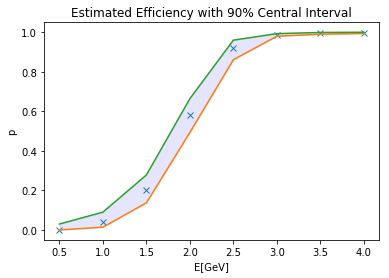

In [18]:
plt.plot(Energies, Efficiencies_estimate, marker='x', linestyle='')
plt.plot(Energies, p_min)
plt.plot(Energies, p_max)
plt.fill_between(x=Energies, y1=p_min, y2=p_max, color='blue', alpha=0.1)
plt.xlabel('E[GeV]')
plt.ylabel('p')
plt.title('Estimated Efficiency with 90% Central Interval')
plt.show()

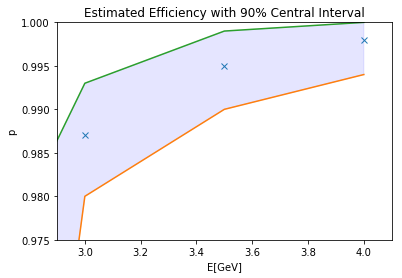

In [19]:
plt.xlim(2.9,4.1)
plt.ylim(0.975,1.0)
plt.plot(Energies, Efficiencies_estimate, marker='x', linestyle='')
plt.plot(Energies, p_min)
plt.plot(Energies, p_max)
plt.fill_between(x=Energies, y1=p_min, y2=p_max, color='blue', alpha=0.1)
plt.xlabel('E[GeV]')
plt.ylabel('p')
plt.title('Estimated Efficiency with 90% Central Interval')
plt.show()

# Now for the Smallest Interval

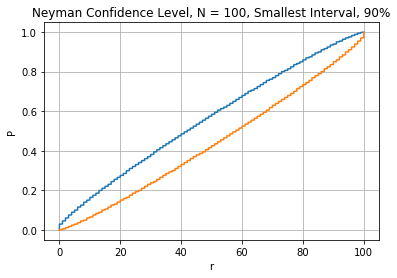

In [59]:
r_min_100_si, r_max_100_si, p_values = neyman_CL(100,'si')
plt.plot(r_min_100_si, p_values)
plt.plot(r_max_100_si, p_values)
plt.xlabel('r')
plt.ylabel('P')
#plt.title('Neyman Confidence Level, N = 100, Central Interval, 90%')
plt.title('Neyman Confidence Level, N = 100, Smallest Interval, 90%')
plt.grid(True)
plt.show()

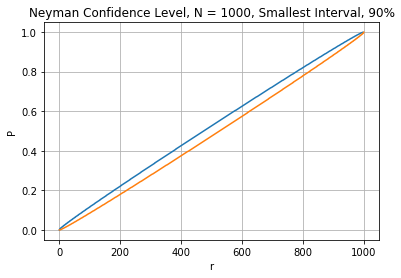

In [21]:
r_min_1000_si, r_max_1000_si, p_values = neyman_CL(1000,'si')
plt.plot(r_min_1000_si, p_values)
plt.plot(r_max_1000_si, p_values)
plt.xlabel('r')
plt.ylabel('P')
#plt.title('Neyman Confidence Level, N = 1000, Central Interval, 90%')
plt.title('Neyman Confidence Level, N = 1000, Smallest Interval, 90%')
plt.grid(True)
plt.show()

In [33]:
print("Smallest Interval")
print("E(GeV)\t N\t r\t p_est\t p_min\t p_max" )

p_min_si = []
p_max_si = []

for i in range(0,len(Energies)):
    E = Energies[i]
    R = Successes[i]
    N = Trials[i]
    p_est_si = Efficiencies_estimate[i]
    if(N == 1000):
        r_min = r_min_1000_si
        r_max = r_max_1000_si
    else:
        r_min = r_min_100_si
        r_max = r_max_100_si
        
    p_min_si.append(np.asarray(r_max).searchsorted(R, side='left')/1000.)
    p_max_si.append(np.asarray(r_min).searchsorted(R, side='right')/1000.)
    print(str(E)+ '\t'+str(N)+ "\t"+ str(R)+ "\t"+ str(p_est_si)+ "\t"+ str(p_min_si[i])+ "\t" +str(p_max_si[i]))

Smallest Interval
E(GeV)	 N	 r	 p_est	 p_min	 p_max
0.5	100	0	0.0	0.0	0.03
1.0	100	4	0.04	0.018	0.09
1.5	100	20	0.2	0.141	0.276
2.0	100	58	0.58	0.496	0.66
2.5	100	92	0.92	0.86	0.955
3.0	1000	987	0.987	0.98	0.993
3.5	1000	995	0.995	0.99	0.998
4.0	1000	998	0.998	0.994	1.0


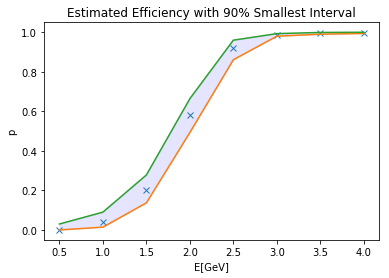

In [34]:
plt.plot(Energies, Efficiencies_estimate, marker='x', linestyle='')
plt.plot(Energies, p_min)
plt.plot(Energies, p_max)
plt.fill_between(x=Energies, y1=p_min, y2=p_max, color='blue', alpha=0.1)
plt.xlabel('E[GeV]')
plt.ylabel('p')
plt.title('Estimated Efficiency with 90% Smallest Interval')
plt.show()

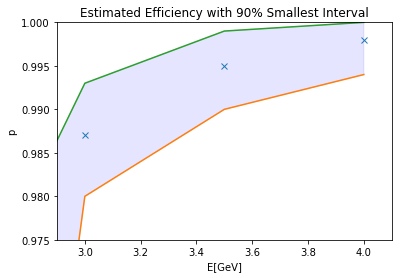

In [35]:
plt.xlim(2.9,4.1)
plt.ylim(0.975,1.0)
plt.plot(Energies, Efficiencies_estimate, marker='x', linestyle='')
plt.plot(Energies, p_min)
plt.plot(Energies, p_max)
plt.fill_between(x=Energies, y1=p_min, y2=p_max, color='blue', alpha=0.1)
plt.xlabel('E[GeV]')
plt.ylabel('p')
plt.title('Estimated Efficiency with 90% Smallest Interval')
plt.show()

In [62]:
np.asarray(r_max_100) - np.asarray(r_max_100_si)
#print(r_max_100,r_max_100_si)
len(r_max_100)

1000

In [63]:
binom(100,100,0.998)

0.8185668046884277

In [69]:
for p in np.arange(0.980,1.,1/1000.):
    for r in np.arange(0,101,1):
        v = binom(r,100,p)
        if v>0.9:
            print(v, r, p)

(0.90479214711370892, 100, 0.999)
(1.0, 100, 1.0)
